# Topic Modelling

## Pre-Processing

In [2]:
import pandas as pd
import numpy as np
from pprint import pprint

In [3]:
data = pd.read_excel("C:/Users/Irsyadobby/Documents/BDC 2023/Semifinal/Data Clean/Data Ayat Gabung.xlsx")
data

,No.,Jenis,Nomor,Tahun,Pasal,Ayat,Teks
0,1,Undang-Undang,1,2004,1,0,Dalam Undang-undang ini yang dimaksud dengan:\...
1,2,Undang-Undang,1,2004,1,1,Perbendaharaan Negara adalah pengelolaan dan p...
2,3,Undang-Undang,1,2004,1,2,Kas Negara adalah tempat penyimpanan uang nega...
3,4,Undang-Undang,1,2004,1,3,Rekening Kas Umum Negara adalah rekening tempa...
4,5,Undang-Undang,1,2004,1,4,Kas Daerah adalah tempat penyimpanan uang daer...
...,...,...,...,...,...,...,...
6899,6900,Peraturan Presiden,37,1970,5,0,KELIMA: Biajapelaksanaantugas Team Peneliti di...
6900,6901,Peraturan Presiden,37,1970,6,0,KEENAM : KeputusanPresidenini mulai berlakupad...
6901,6902,Peraturan Presiden,295,1965,1,0,PERTAMA : Menteri Urusan Perasuransian bertuga...
6902,6903,Peraturan Presiden,295,1965,2,0,KEDUA : Bidang kerdja Menteri Urusan Perasuran...


In [4]:
# Cleaning Data
import string 
import re

# Import word_tokenize & FreqDist from NLTK
from nltk.tokenize import word_tokenize 
from nltk.probability import FreqDist

#remove number
def remove_number(text):
    return  re.sub(r"\d+", "", text)
data['Teks'] = data['Teks'].apply(remove_number)

# remove mention and special character
def mention(text):
    return re.sub(r"(?:\@|https?\://)\S+", "", text)
data['Teks'] = data['Teks'].apply(mention)

# lowercase string
def lowercase_string(text):
    return text.lower()
data['Teks'] = data['Teks'].apply(lowercase_string)

#remove punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))
data['Teks'] = data['Teks'].apply(remove_punctuation)

# remove single char
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)
data['Teks'] = data['Teks'].apply(remove_singl_char)

#remove multiple whitespace into single whitespace -- leading & trailing whitespace
def remove_whitespace_multiple(text):
    return ' '.join(text.split())
data['Teks'] = data['Teks'].apply(remove_whitespace_multiple)

In [5]:
data['Teks']

0       dalam undangundang ini yang dimaksud dengan pe...
1       perbendaharaan negara adalah pengelolaan dan p...
2       kas negara adalah tempat penyimpanan uang nega...
3       rekening kas umum negara adalah rekening tempa...
4       kas daerah adalah tempat penyimpanan uang daer...
                              ...                        
6899    kelima biajapelaksanaantugas team peneliti dib...
6900    keenam keputusanpresidenini mulai berlakupadat...
6901    pertama menteri urusan perasuransian bertugas ...
6902    kedua bidang kerdja menteri urusan perasuransi...
6903    ketiga keputusan ini mulai berlaku pada tangga...
Name: Teks, Length: 6904, dtype: object

In [6]:
# Tokenizing
def word_tokenize_wrapper(text):
    return word_tokenize(text)

data['tokens'] = data['Teks'].apply(word_tokenize_wrapper)

In [7]:
# Remove Stopwords
from nltk.corpus import stopwords

stopwords = pd.read_csv("C:/Users/Irsyadobby/Documents/BDC 22/stopwordbahasa.csv", header = None)
stopwords_notfix = stopwords.index.isin([46,50, 66,232,351,357, 371,725,726,727,728])
stopwords_fix = stopwords[~stopwords_notfix]
stopwords_fix = pd.DataFrame(stopwords_fix)

# tambahan stopwords
tambahan = pd.DataFrame(['ayat','pasal','wwwbphngoid','undangundang','wwwhukumonlinecom','bphngoid'])

stopwords_fix1 = pd.concat([stopwords_fix, tambahan], ignore_index=True)
stop = stopwords_fix1[0].values.tolist()

def stopwords_removal(words):
    return [word for word in words if word not in stop]
data['token_filtered'] = data['tokens'].apply(stopwords_removal)

In [8]:
# Gabungkan Data clean menjadi satu kalimat
def toSentence(list_words): # Convert list of words into sentence
    sentence = ' '.join(word for word in list_words)
    return sentence

data['Teks Clean'] = data['token_filtered'].apply(toSentence)

In [9]:
data

,No.,Jenis,Nomor,Tahun,Pasal,Ayat,Teks,tokens,token_filtered,Teks Clean
0,1,Undang-Undang,1,2004,1,0,dalam undangundang ini yang dimaksud dengan pe...,"[dalam, undangundang, ini, yang, dimaksud, den...",[perbendaharaan],perbendaharaan
1,2,Undang-Undang,1,2004,1,1,perbendaharaan negara adalah pengelolaan dan p...,"[perbendaharaan, negara, adalah, pengelolaan, ...","[perbendaharaan, negara, pengelolaan, pertangg...",perbendaharaan negara pengelolaan pertanggungj...
2,3,Undang-Undang,1,2004,1,2,kas negara adalah tempat penyimpanan uang nega...,"[kas, negara, adalah, tempat, penyimpanan, uan...","[kas, negara, penyimpanan, uang, negara, diten...",kas negara penyimpanan uang negara ditentukan ...
3,4,Undang-Undang,1,2004,1,3,rekening kas umum negara adalah rekening tempa...,"[rekening, kas, umum, negara, adalah, rekening...","[rekening, kas, negara, rekening, penyimpanan,...",rekening kas negara rekening penyimpanan uang ...
4,5,Undang-Undang,1,2004,1,4,kas daerah adalah tempat penyimpanan uang daer...,"[kas, daerah, adalah, tempat, penyimpanan, uan...","[kas, daerah, penyimpanan, uang, daerah, diten...",kas daerah penyimpanan uang daerah ditentukan ...
...,...,...,...,...,...,...,...,...,...,...
6899,6900,Peraturan Presiden,37,1970,5,0,kelima biajapelaksanaantugas team peneliti dib...,"[kelima, biajapelaksanaantugas, team, peneliti...","[biajapelaksanaantugas, team, peneliti, dibeba...",biajapelaksanaantugas team peneliti dibebakan ...
6900,6901,Peraturan Presiden,37,1970,6,0,keenam keputusanpresidenini mulai berlakupadat...,"[keenam, keputusanpresidenini, mulai, berlakup...","[keenam, keputusanpresidenini, berlakupadatang...",keenam keputusanpresidenini berlakupadatanggal...
6901,6902,Peraturan Presiden,295,1965,1,0,pertama menteri urusan perasuransian bertugas ...,"[pertama, menteri, urusan, perasuransian, bert...","[menteri, urusan, perasuransian, bertugas, ber...",menteri urusan perasuransian bertugas berwenan...
6902,6903,Peraturan Presiden,295,1965,2,0,kedua bidang kerdja menteri urusan perasuransi...,"[kedua, bidang, kerdja, menteri, urusan, peras...","[bidang, kerdja, menteri, urusan, perasuransia...",bidang kerdja menteri urusan perasuransian mel...


In [10]:
# Lemmatize
# Lemmatizer 
from nlp_id.lemmatizer import Lemmatizer 

# Gabungkan Data clean menjadi satu kalimat
def toSentence(list_words): # Convert list of words into sentence
    sentence = ' '.join(word for word in list_words)
    return sentence

data['unlemmatized'] = data['token_filtered'].apply(toSentence)

lemmatizer = Lemmatizer()

for i in range(0, data.shape[0]) :
    data.loc[i, 'teks lemmatized'] = lemmatizer.lemmatize(data.loc[i,'unlemmatized'])

In [11]:
data['token_lemmatized'] = data['teks lemmatized'].apply(word_tokenize_wrapper)

## LDA

In [12]:
text = data['teks lemmatized']
text_list = [i.split() for i in text]

In [13]:
import gensim
#Create Bigram & Trigram Models 
from gensim.models import Phrases
# Add bigrams and trigrams to docs,minimum count 10 means only that appear 10 times or more.
bigram = Phrases(text_list, min_count = 20)
trigram = Phrases(bigram[text_list])
for idx in range(len(text_list)):
    for token in bigram[text_list[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            text_list[idx].append(token)
    for token in trigram[text_list[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            text_list[idx].append(token)

In [14]:
from gensim import corpora, models
# Create a dictionary representation of the documents.
dictionary = corpora.Dictionary(text_list)
dictionary.filter_extremes(no_below = 10, no_above = 0.2) 
# no_below (int, optional) – Keep tokens which are contained in at least no_below documents.
# no_above (float, optional) – Keep tokens which are contained in no more than no_above documents (fraction of total corpus size, not an absolute number).
print(dictionary)

Dictionary(1561 unique tokens: ['bendahara', 'apbd', 'apbn', 'bendahara_negara', 'investasi']...)


In [17]:
#https://radimrehurek.com/gensim/tut1.html 
#build corpus
# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in text_list]
#The function doc2bow converts document (a list of words) into the bag-of-words format
'''The function doc2bow() simply counts the number of occurrences of each distinct word, 
converts the word to its integer word id and returns the result as a sparse vector. 
The sparse vector [(0, 1), (1, 1)] therefore reads: in the document “Human computer interaction”, 
the words computer (id 0) and human (id 1) appear once; 
the other ten dictionary words appear (implicitly) zero times.'''
print(len(doc_term_matrix))
print(doc_term_matrix[100])
tfidf = models.TfidfModel(doc_term_matrix) #build TF-IDF model
corpus_tfidf = tfidf[doc_term_matrix]

6904
[(23, 1), (55, 1), (71, 1), (89, 1), (121, 1), (150, 1), (258, 1)]


In [15]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from numpy import array
#function to compute coherence values
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, iterations=100)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        
    return model_list, coherence_values

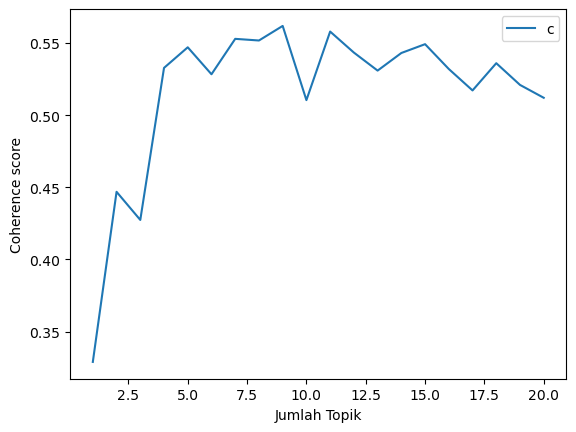

In [19]:
start = 1
limit = 21
step = 1
model_list, coherence_values = compute_coherence_values(dictionary, corpus = corpus_tfidf, 
                                                        texts = text_list, start = start, limit = limit, step = step)
#show graphs
import matplotlib.pyplot as plt
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Jumlah Topik")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc = 'best')
plt.show()

In [20]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 6))

Num Topics = 1  has Coherence Value of 0.32902
Num Topics = 2  has Coherence Value of 0.446897
Num Topics = 3  has Coherence Value of 0.427398
Num Topics = 4  has Coherence Value of 0.532753
Num Topics = 5  has Coherence Value of 0.547019
Num Topics = 6  has Coherence Value of 0.528335
Num Topics = 7  has Coherence Value of 0.552875
Num Topics = 8  has Coherence Value of 0.551735
Num Topics = 9  has Coherence Value of 0.561833
Num Topics = 10  has Coherence Value of 0.510424
Num Topics = 11  has Coherence Value of 0.557921
Num Topics = 12  has Coherence Value of 0.54337
Num Topics = 13  has Coherence Value of 0.530876
Num Topics = 14  has Coherence Value of 0.543077
Num Topics = 15  has Coherence Value of 0.549184
Num Topics = 16  has Coherence Value of 0.531979
Num Topics = 17  has Coherence Value of 0.517133
Num Topics = 18  has Coherence Value of 0.536009
Num Topics = 19  has Coherence Value of 0.520962
Num Topics = 20  has Coherence Value of 0.512038


In [21]:
df_perplexity = pd.DataFrame(columns = ['Topics','Perplexity'])

df_loop = []
for i in range(1,21) :
    model_loop = LdaModel(corpus = corpus_tfidf, id2word = dictionary, num_topics = i)
    df = {'Topics' : i, 'Perplexity' : model_loop.log_perplexity(corpus_tfidf)}
    df_loop.append(df)

df_loop

[{'Topics': 1, 'Perplexity': -7.428897095027229},
 {'Topics': 2, 'Perplexity': -7.750883091304172},
 {'Topics': 3, 'Perplexity': -7.957888174922954},
 {'Topics': 4, 'Perplexity': -8.129061756313387},
 {'Topics': 5, 'Perplexity': -8.291155078324662},
 {'Topics': 6, 'Perplexity': -8.424462343719638},
 {'Topics': 7, 'Perplexity': -8.53935653997149},
 {'Topics': 8, 'Perplexity': -8.686419660284683},
 {'Topics': 9, 'Perplexity': -8.873249923179683},
 {'Topics': 10, 'Perplexity': -9.199129245302922},
 {'Topics': 11, 'Perplexity': -9.673964277272232},
 {'Topics': 12, 'Perplexity': -10.298437855430654},
 {'Topics': 13, 'Perplexity': -11.069517599855473},
 {'Topics': 14, 'Perplexity': -11.682421417423308},
 {'Topics': 15, 'Perplexity': -12.32245290434553},
 {'Topics': 16, 'Perplexity': -12.719459621269426},
 {'Topics': 17, 'Perplexity': -13.067960314724948},
 {'Topics': 18, 'Perplexity': -13.358712966091977},
 {'Topics': 19, 'Perplexity': -13.72800827255452},
 {'Topics': 20, 'Perplexity': -14.0

In [22]:
model = LdaModel(corpus = corpus_tfidf, id2word = dictionary, num_topics = 15, random_state = 42) #num topic menyesuaikan hasil dari coherence value paling tinggi
for idx, topic in model.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic)) 

Topic: 0 Word: 0.038*"kepala_daerah" + 0.026*"guna_anggar" + 0.023*"pegawai_negeri" + 0.022*"presiden" + 0.020*"atur_presiden" + 0.018*"bursa_efek" + 0.017*"kepala_daerah_kepala_daerah" + 0.017*"pegawai_negeri_pegawai_negeri" + 0.015*"bab_ix" + 0.013*"tanggung"
Topic: 1 Word: 0.057*"lingkung_hidup" + 0.048*"ilmu_tahu" + 0.029*"bab_iv" + 0.019*"sumber_daya" + 0.012*"kaya_negara" + 0.012*"tanggal_desember" + 0.011*"usaha_asuransi" + 0.011*"jamin_simpan" + 0.010*"sesuai_tentu_atur_perundangundangan" + 0.010*"menteri"
Topic: 2 Word: 0.068*"tugas_fungsi" + 0.047*"milik_negara" + 0.044*"rumus_bijak" + 0.036*"atur_perundangundangan" + 0.028*"tentu_tata" + 0.013*"manajer_investasi" + 0.013*"surat_utang" + 0.012*"sanksi_administratif" + 0.012*"cabut_nyata" + 0.011*"monitoring_evaluasi"
Topic: 3 Word: 0.053*"data_informasi" + 0.040*"calon_anggota" + 0.038*"serta_modal" + 0.037*"aju_mohon" + 0.025*"ampun_pajak" + 0.023*"susun_rancang" + 0.018*"sosial_budaya" + 0.013*"rancang" + 0.011*"tarik_dana"

In [23]:
# Print the Keyword in the 10 topics
pprint(model.print_topics())
doc_lda = model[corpus_tfidf]

[(0,
  '0.038*"kepala_daerah" + 0.026*"guna_anggar" + 0.023*"pegawai_negeri" + '
  '0.022*"presiden" + 0.020*"atur_presiden" + 0.018*"bursa_efek" + '
  '0.017*"kepala_daerah_kepala_daerah" + 0.017*"pegawai_negeri_pegawai_negeri" '
  '+ 0.015*"bab_ix" + 0.013*"tanggung"'),
 (1,
  '0.057*"lingkung_hidup" + 0.048*"ilmu_tahu" + 0.029*"bab_iv" + '
  '0.019*"sumber_daya" + 0.012*"kaya_negara" + 0.012*"tanggal_desember" + '
  '0.011*"usaha_asuransi" + 0.011*"jamin_simpan" + '
  '0.010*"sesuai_tentu_atur_perundangundangan" + 0.010*"menteri"'),
 (2,
  '0.068*"tugas_fungsi" + 0.047*"milik_negara" + 0.044*"rumus_bijak" + '
  '0.036*"atur_perundangundangan" + 0.028*"tentu_tata" + '
  '0.013*"manajer_investasi" + 0.013*"surat_utang" + '
  '0.012*"sanksi_administratif" + 0.012*"cabut_nyata" + '
  '0.011*"monitoring_evaluasi"'),
 (3,
  '0.053*"data_informasi" + 0.040*"calon_anggota" + 0.038*"serta_modal" + '
  '0.037*"aju_mohon" + 0.025*"ampun_pajak" + 0.023*"susun_rancang" + '
  '0.018*"sosial_buday

In [24]:
import gensim
import pyLDAvis.gensim_models; pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(model, corpus_tfidf, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
2     -0.005459  0.158291       1        1  8.990581
5     -0.123032  0.055420       2        1  8.459560
0     -0.042843 -0.036853       3        1  7.387834
4      0.084552 -0.101912       4        1  7.251528
1      0.009304  0.022382       5        1  7.133286
11    -0.170151  0.025009       6        1  6.959710
13     0.018836  0.006109       7        1  6.822508
6      0.019055 -0.048667       8        1  6.780781
12     0.072148 -0.056326       9        1  6.399348
8     -0.070770 -0.018626      10        1  6.258259
9      0.022899 -0.043191      11        1  6.092305
10     0.151393  0.177458      12        1  5.644504
14     0.026902 -0.060150      13        1  5.585991
7     -0.023064 -0.008508      14        1  5.283876
3      0.030231 -0.070437      15        1  4.949929, topic_info=                                     Term        Freq       Total Category  \
1100                      selenggara_urus  108.000000  108.000000  Default   
700                          dana_pensiun   92.000000   92.000000  Default   
590   sesuai_tentu_atur_perundangundangan  118.000000  118.000000  Default   
1254                      pantau_evaluasi   79.000000   79.000000  Default   
578                          tugas_fungsi  104.000000  104.000000  Default   
...                                   ...         ...         ...      ...   
28                                 daerah    5.291113   79.069446  Topic15   
112                                bentuk    4.055028   26.506202  Topic15   
208                                 huruf    4.304831   58.476016  Topic15   
494                           wajib_pajak    3.931816   30.698661  Topic15   
6                               investasi    4.166303  111.851351  Topic15   

      logprob  loglift  
1100  30.0000  30.0000  
700   29.0000  29.0000  
590   28.0000  28.0000  
1254  27.0000  27.0000  
578   26.0000  26.0000  
...       ...      ...  
28    -5.0164   0.3015  
112   -5.2825   1.1284  
208   -5.2227   0.3969  
494   -5.3134   0.9507  
6     -5.2554  -0.2843  

[700 rows x 6 columns], token_table=      Topic      Freq                      Term
term                                           
251       3  0.128883                       ada
251       5  0.064441                       ada
251       7  0.451090                       ada
251      11  0.193324                       ada
252       9  0.075059                ada_barang
...     ...       ...                       ...
747      12  0.130596              warga_negara
748       5  0.689152  warga_negara_badan_hukum
748      12  0.137830  warga_negara_badan_hukum
1351     11  0.795817          wenang_supervisi
599      13  0.518948                     wujud

[1981 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 6, 1, 5, 2, 12, 14, 7, 13, 9, 10, 11, 15, 8, 4])

In [25]:
# Compute Perplexity
print('\nPerplexity: ', model.log_perplexity(corpus_tfidf))  # a measure of how good the model is. lower the better.


Perplexity:  -12.273713227057199


In [105]:
df_loop

,Topics,Perplexity
0,1,-7.469863
1,2,-7.763523
2,3,-7.946439
3,4,-8.153709
4,5,-8.276833
5,6,-8.419157
6,7,-8.515839
7,8,-8.714207
8,9,-8.907612
9,10,-9.158559


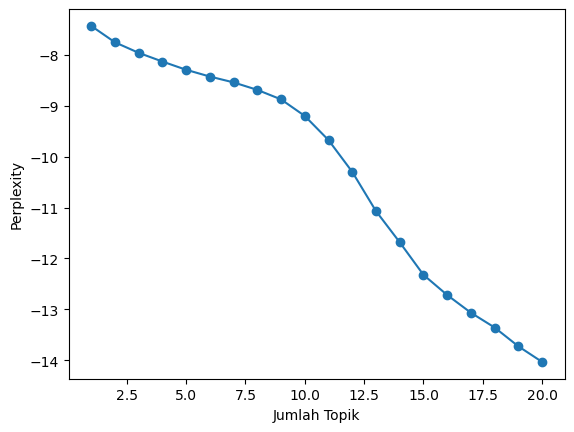

In [26]:
df_loop = pd.DataFrame(df_loop, columns = ['Topics','Perplexity'])
plt.plot(df_loop['Topics'], df_loop['Perplexity'], marker = 'o', linestyle = '-')
plt.xlabel('Jumlah Topik')
plt.ylabel('Perplexity')
plt.show()

In [176]:
topics = model.print_topics(num_topics = 15, num_words = 15)

# Assign cluster labels to the DataFrame
cluster_labels = []
for doc in corpus_tfidf:
    topic_dist = model.get_document_topics(doc)
    dominant_topic = max(topic_dist, key=lambda x: x[1])
    cluster_labels.append(dominant_topic[0])

data['Cluster'] = cluster_labels

In [233]:
cluster = []
probs = []

for doc in corpus_tfidf:
    topic_dist = model.get_document_topics(doc)
    topic_probs = [tup[1] for tup in topic_dist]
    dominant_topic = max(topic_dist, key=lambda x: x[1])
    probs.append(topic_probs)
    cluster.append(dominant_topic[0])


In [237]:
data = data[['Jenis','Nomor','Tahun','Pasal','Ayat']]
data['Cluster'] = cluster
data['Cluster Probs'] = probs

C:\Users\Irsyadobby\AppData\Local\Temp\ipykernel_37260\602183517.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cluster'] = cluster
C:\Users\Irsyadobby\AppData\Local\Temp\ipykernel_37260\602183517.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cluster Probs'] = probs


In [239]:
data.loc[1:3, :]

,Jenis,Nomor,Tahun,Pasal,Ayat,Cluster,Cluster Probs
1,Undang-Undang,1,2004,1,1,7,"[0.017433569, 0.017433573, 0.01743357, 0.01743..."
2,Undang-Undang,1,2004,1,2,7,"[0.01757487, 0.017574865, 0.33238325, 0.017574..."
3,Undang-Undang,1,2004,1,3,3,"[0.015768288, 0.015767645, 0.015771287, 0.6264..."


In [241]:
data['Teks'] = df['Teks']

C:\Users\Irsyadobby\AppData\Local\Temp\ipykernel_37260\1670336292.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Teks'] = df['Teks']


In [243]:
data = data[['Jenis','Nomor','Tahun','Pasal','Ayat','Teks','Cluster','Cluster Probs']]

In [245]:
data.drop(['Jenis','Nomor','Tahun','Pasal','Ayat'], axis = 1, inplace = True)

C:\Users\Irsyadobby\AppData\Local\Temp\ipykernel_37260\527218233.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(['Jenis','Nomor','Tahun','Pasal','Ayat'], axis = 1, inplace = True)


,Teks,Cluster,Cluster Probs
0,dalam undangundang ini yang dimaksud dengan 1 ...,7,"[0.03333419, 0.03333419, 0.033334218, 0.033334..."
1,perbendaharaan negara adalah pengelolaan dan p...,7,"[0.017433569, 0.017433573, 0.01743357, 0.01743..."
2,kas negara adalah tempat penyimpanan uang nega...,7,"[0.01757487, 0.017574865, 0.33238325, 0.017574..."
3,rekening kas umum negara adalah rekening tempa...,3,"[0.015768288, 0.015767645, 0.015771287, 0.6264..."
4,kas daerah adalah tempat penyimpanan uang daer...,3,"[0.017154744, 0.01715474, 0.30437058, 0.472617..."
...,...,...,...
6899,kelima biajapelaksanaantugas team peneliti dib...,9,"[0.042634033, 0.04263404, 0.04263404, 0.042634..."
6900,keenam keputusanpresidenini mulai berlakupadat...,12,"[0.02857652, 0.028576538, 0.02857652, 0.028576..."
6901,pertama menteri urusan perasuransian bertugas ...,3,"[0.011310643, 0.011310743, 0.01131063, 0.22120..."
6902,kedua bidang kerdja menteri urusan perasuransi...,3,"[0.015850376, 0.015850361, 0.015863856, 0.4079..."


In [246]:
data

,Teks,Cluster,Cluster Probs
0,dalam undangundang ini yang dimaksud dengan 1 ...,7,"[0.03333419, 0.03333419, 0.033334218, 0.033334..."
1,perbendaharaan negara adalah pengelolaan dan p...,7,"[0.017433569, 0.017433573, 0.01743357, 0.01743..."
2,kas negara adalah tempat penyimpanan uang nega...,7,"[0.01757487, 0.017574865, 0.33238325, 0.017574..."
3,rekening kas umum negara adalah rekening tempa...,3,"[0.015768288, 0.015767645, 0.015771287, 0.6264..."
4,kas daerah adalah tempat penyimpanan uang daer...,3,"[0.017154744, 0.01715474, 0.30437058, 0.472617..."
...,...,...,...
6899,kelima biajapelaksanaantugas team peneliti dib...,9,"[0.042634033, 0.04263404, 0.04263404, 0.042634..."
6900,keenam keputusanpresidenini mulai berlakupadat...,12,"[0.02857652, 0.028576538, 0.02857652, 0.028576..."
6901,pertama menteri urusan perasuransian bertugas ...,3,"[0.011310643, 0.011310743, 0.01131063, 0.22120..."
6902,kedua bidang kerdja menteri urusan perasuransi...,3,"[0.015850376, 0.015850361, 0.015863856, 0.4079..."


### Buat File per Cluster

In [ ]:
# Buat File per Cluster
## Cluster 1
cluster1 = data[data['Cluster'] == 0]
cluster1.to_excel("C:/Users/Irsyadobby/Documents/BDC 2023/Semifinal/Data Cluster/cluster 1.xlsx")

## Cluster 2
cluster2 = data[data['Cluster'] == 1]
cluster2.to_excel("C:/Users/Irsyadobby/Documents/BDC 2023/Semifinal/Data Cluster/cluster 2.xlsx")

## Cluster 3
cluster3 = data[data['Cluster'] == 2]
cluster3.to_excel("C:/Users/Irsyadobby/Documents/BDC 2023/Semifinal/Data Cluster/cluster 3.xlsx")

## Cluster 4
cluster4 = data[data['Cluster'] == 3]
cluster4.to_excel("C:/Users/Irsyadobby/Documents/BDC 2023/Semifinal/Data Cluster/cluster 4.xlsx")

## Cluster 5
cluster5 = data[data['Cluster'] == 4]
cluster5.to_excel("C:/Users/Irsyadobby/Documents/BDC 2023/Semifinal/Data Cluster/cluster 5.xlsx")

## Cluster 6
cluster6 = data[data['Cluster'] == 5]
cluster6.to_excel("C:/Users/Irsyadobby/Documents/BDC 2023/Semifinal/Data Cluster/cluster 6.xlsx")

## Cluster 7
cluster7 = data[data['Cluster'] == 6]
cluster7.to_excel("C:/Users/Irsyadobby/Documents/BDC 2023/Semifinal/Data Cluster/cluster 7.xlsx")

## Cluster 8
cluster8 = data[data['Cluster'] == 7]
cluster8.to_excel("C:/Users/Irsyadobby/Documents/BDC 2023/Semifinal/Data Cluster/cluster 8.xlsx")

## Cluster 9
cluster9 = data[data['Cluster'] == 8]
cluster9.to_excel("C:/Users/Irsyadobby/Documents/BDC 2023/Semifinal/Data Cluster/cluster 9.xlsx")

## Cluster 10
cluster10 = data[data['Cluster'] == 9]
cluster10.to_excel("C:/Users/Irsyadobby/Documents/BDC 2023/Semifinal/Data Cluster/cluster 10.xlsx")

## Cluster 11
cluster11 = data[data['Cluster'] == 10]
cluster11.to_excel("C:/Users/Irsyadobby/Documents/BDC 2023/Semifinal/Data Cluster/cluster 11.xlsx")

## Cluster 12
cluster12 = data[data['Cluster'] == 11]
cluster12.to_excel("C:/Users/Irsyadobby/Documents/BDC 2023/Semifinal/Data Cluster/cluster 12.xlsx")

## Cluster 13
cluster13 = data[data['Cluster'] == 12]
cluster13.to_excel("C:/Users/Irsyadobby/Documents/BDC 2023/Semifinal/Data Cluster/cluster 13.xlsx")

## Cluster 14
cluster14 = data[data['Cluster'] == 13]
cluster14.to_excel("C:/Users/Irsyadobby/Documents/BDC 2023/Semifinal/Data Cluster/cluster 14.xlsx")

## Cluster 15
cluster15 = data[data['Cluster'] == 14]
cluster15.to_excel("C:/Users/Irsyadobby/Documents/BDC 2023/Semifinal/Data Cluster/cluster 15.xlsx")

## Visualisasi Topic Modelling

In [16]:
model2 = LdaModel(corpus = corpus_tfidf, id2word = dictionary, num_topics = 6, random_state = 42)

NameError: name 'corpus_tfidf' is not defined

: 

In [62]:
pyLDAvis.enable_notebook(local = True)
pyLDAvis.gensim_models.prepare(model2, corpus_tfidf, dictionary, mds = 'tsne')

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
2       7.776794 -92.357101       1        1  19.275467
5     -72.457634  43.097706       2        1  17.846208
3     -10.187199 -11.395043       3        1  15.967322
0      72.203712 -19.188353       4        1  15.888594
4      22.729998  64.576233       5        1  15.567496
1     -81.402054 -53.723450       6        1  15.454914, topic_info=                                                   Term        Freq  \
1812                                 sekretaris_kabinet   94.000000   
1100                                    selenggara_urus   89.000000   
1254                                    pantau_evaluasi   77.000000   
578                                        tugas_fungsi   91.000000   
1397                                        tanam_modal  226.000000   
1768                                     bidang_maritim   65.000000   
1670                                         ubah_iklim  147.000000   
700                                        dana_pensiun   52.000000   
583                                        milik_negara   77.000000   
1035                                        sumber_daya   65.000000   
1575                                       anggota_djsn   44.000000   
1164                                        rumus_bijak   51.000000   
1786                                      deputi_bidang  143.000000   
1770                                menteri_koordinator  116.000000   
1771                 menteri_koordinator_bidang_maritim   54.000000   
590                 sesuai_tentu_atur_perundangundangan   73.000000   
1439                                    unit_organisasi   43.000000   
1356                                        beri_dukung   35.000000   
1387                                       capai_target   35.000000   
414                                      putus_presiden   34.000000   
1078                                      subsidi_bunga   43.000000   
474                                  republik_indonesia   55.000000   
219                                    jabat_fungsional   32.000000   
651                                       kepala_daerah   49.000000   
217                                        anggar_dapat   42.000000   
597                                          tentu_tata   43.000000   
1105                                      limpah_wenang   33.000000   
1175                                     lingkung_hidup   46.000000   
1022                                  tingkat_kapasitas   27.000000   
1152                                     rencana_bangun   26.000000   
1217                                   sarana_prasarana   22.507058   
1090                               ambil_langkahlangkah   17.554918   
1057                                        cabut_nyata   15.760381   
336                                              bab_vi   15.576050   
439                       pegawai_negeri_pegawai_negeri   15.809372   
938                                             bab_vii   13.488104   
845                                sanksi_administratif   18.277283   
1306                                  rencana_strategis   12.418445   
1056                                         nyata_laku   11.584639   
990                                      direktur_utama   11.354448   
1227                            gubernur_bupatiwalikota   24.811356   
928                                       salah_anggota   10.731386   
578                                        tugas_fungsi   84.470414   
217                                        anggar_dapat   39.481002   
1023                        anggar_dapat_belanja_negara   11.621303   
629                                              bab_ii    8.036914   
1381                          tugas_fungsi_tugas_fungsi    7.752649   
1437                                     transaksi_jadi    7.489994   
597                           

In [27]:
# Iterasi melalui setiap topik
for topic_id in range(model.num_topics):
    print(f"Topik {topic_id}:")
    top_words = model.show_topic(topic_id, topn=10)  # Mengambil 10 kata paling relevan dalam topik
    for word, prob in top_words:
        print(f"{word}: {prob}")
    print("\n")

Topik 0:
kepala_daerah: 0.03829760104417801
guna_anggar: 0.02563420869410038
pegawai_negeri: 0.022893445566296577
presiden: 0.021682346239686012
atur_presiden: 0.019899217411875725
bursa_efek: 0.01828817091882229
kepala_daerah_kepala_daerah: 0.017124852165579796
pegawai_negeri_pegawai_negeri: 0.016628749668598175
bab_ix: 0.01473207026720047
tanggung: 0.012758093886077404


Topik 1:
lingkung_hidup: 0.0574815534055233
ilmu_tahu: 0.048055753111839294
bab_iv: 0.029311582446098328
sumber_daya: 0.019496651366353035
kaya_negara: 0.012090438976883888
tanggal_desember: 0.011615830473601818
usaha_asuransi: 0.011436928063631058
jamin_simpan: 0.011323154903948307
sesuai_tentu_atur_perundangundangan: 0.010145219974219799
menteri: 0.01001423504203558


Topik 2:
tugas_fungsi: 0.06791511923074722
milik_negara: 0.04668477550148964
rumus_bijak: 0.04399733990430832
atur_perundangundangan: 0.03566887974739075
tentu_tata: 0.027940012514591217
manajer_investasi: 0.012991150841116905
surat_utang: 0.012589328

In [28]:
from collections import defaultdict

# Membuat kamus kosong untuk menyimpan jumlah kata dalam setiap topik
topic_word_counts = defaultdict(lambda: defaultdict(int))

# Iterasi melalui setiap dokumen dalam korpus
for doc in corpus_tfidf:
    doc_topics = model.get_document_topics(doc)  # Mendapatkan distribusi topik untuk dokumen
    for topic_id, prob in doc_topics:
        top_words = model.show_topic(topic_id, topn=10)  # Mengambil 10 kata paling relevan dalam topik
        for word, _ in top_words:
            topic_word_counts[topic_id][word] += 1

# Mencetak jumlah kata yang sering muncul dalam setiap topik
for topic_id, word_count in topic_word_counts.items():
    print(f"Topik {topic_id}:")
    for word, count in word_count.items():
        print(f"{word}: {count}")
    print("\n")

Topik 0:
kepala_daerah: 6903
guna_anggar: 6903
pegawai_negeri: 6903
presiden: 6903
atur_presiden: 6903
bursa_efek: 6903
kepala_daerah_kepala_daerah: 6903
pegawai_negeri_pegawai_negeri: 6903
bab_ix: 6903
tanggung: 6903


Topik 1:
lingkung_hidup: 6903
ilmu_tahu: 6903
bab_iv: 6903
sumber_daya: 6903
kaya_negara: 6903
tanggal_desember: 6903
usaha_asuransi: 6903
jamin_simpan: 6903
sesuai_tentu_atur_perundangundangan: 6903
menteri: 6903


Topik 2:
tugas_fungsi: 6903
milik_negara: 6903
rumus_bijak: 6903
atur_perundangundangan: 6903
tentu_tata: 6903
manajer_investasi: 6903
surat_utang: 6903
sanksi_administratif: 6903
cabut_nyata: 6903
monitoring_evaluasi: 6903


Topik 3:
data_informasi: 6903
calon_anggota: 6903
serta_modal: 6903
aju_mohon: 6903
ampun_pajak: 6903
susun_rancang: 6903
sosial_budaya: 6903
rancang: 6903
tarik_dana: 6903
tentu_tutup: 6903


Topik 4:
dana_pensiun: 6903
lapor_uang: 6903
bendahara_negara: 6903
perangkat_daerah: 6903
imbal_hasil: 6903
penuh_syarat: 6903
dua_puluh: 6903
d

In [44]:
import pandas as pd
from collections import defaultdict

# Membuat kamus kosong untuk menyimpan jumlah kata dalam setiap topik
topic_word_counts = defaultdict(lambda: defaultdict(int))

# Iterasi melalui setiap dokumen dalam korpus
for doc in corpus_tfidf:
    doc_topics = model2.get_document_topics(doc)  # Mendapatkan distribusi topik untuk dokumen
    for topic_id, prob in doc_topics:
        top_words = model2.show_topic(topic_id, topn = 10)  # Mengambil 10 kata paling relevan dalam topik
        for word, _ in top_words:
            topic_word_counts[topic_id][word] += 1

# Membuat list untuk menyimpan data yang akan dimasukkan ke dalam dataframe
dt = []

# Mengisi list dengan data dari kamus topic_word_counts
for topic_id, word_count in topic_word_counts.items():
    for word, count in word_count.items():
        dt.append({'Nomor Topik': topic_id + 1, 'Kata': word, 'Jumlah Kata': count})

# Membuat dataframe dari list data
df = pd.DataFrame(dt)

# Menampilkan dataframe
print(df)

    Nomor Topik                                 Kata  Jumlah Kata
0             1                  menteri_koordinator         6904
1             1                           ubah_iklim         6904
2             1                       bidang_maritim         6904
3             1  sesuai_tentu_atur_perundangundangan         6904
4             1   menteri_koordinator_bidang_maritim         6904
5             1                         sesuai_tentu         6904
6             1           target_mitigasi_ubah_iklim         6904
7             1                    tingkat_kapasitas         6904
8             1             aksi_mitigasi_ubah_iklim         6904
9             1                       presiden_nomor         6904
10            2                      selenggara_urus         6904
11            2                          sumber_daya         6904
12            2                         anggota_djsn         6904
13            2                      unit_organisasi         6904
14        

In [36]:
pd.set_option('display.max_rows', None)
df.to_excel("C:/Users/Irsyadobby/Documents/BDC 2023/Final/Kata Per Topik.xlsx", index = False)

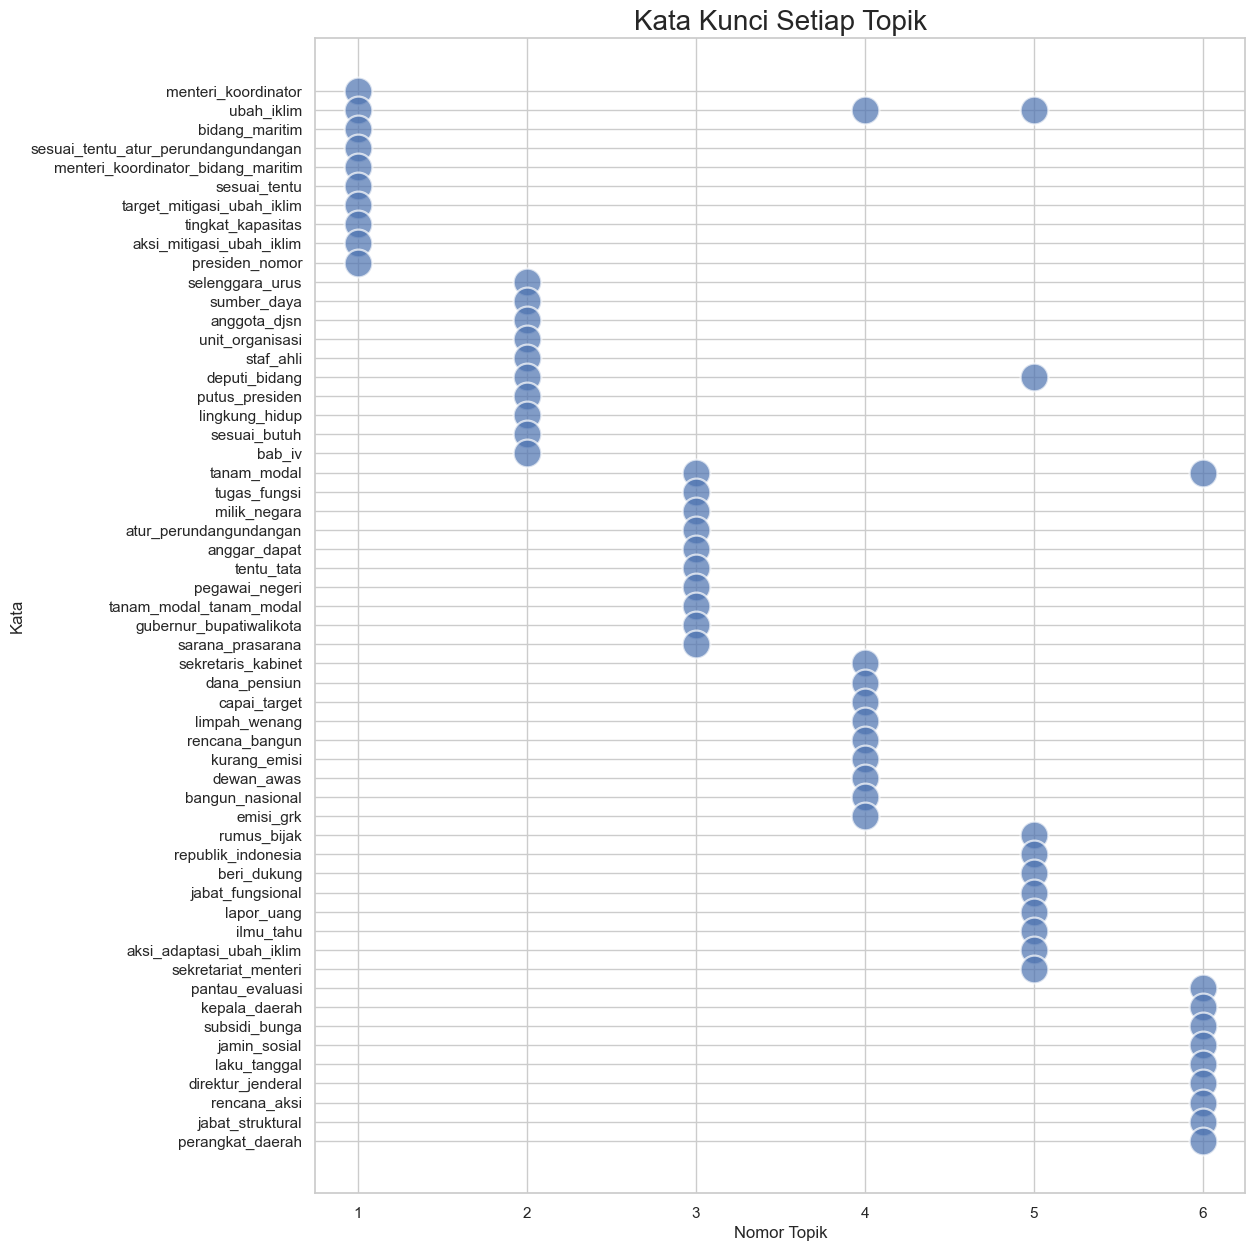

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat visualisasi dot chart menggunakan seaborn
plt.figure(figsize=(12, 15))
sns.set(style="whitegrid")

sns.scatterplot(data = df, x = 'Nomor Topik', y = 'Kata', s = 400, alpha = 0.7)

plt.title('Kata Kunci Setiap Topik', size = 20)
plt.xlabel('Nomor Topik')
plt.ylabel('Kata')

plt.savefig('C:/Users/Irsyadobby/Documents/BDC 2023/Final/Plot Topik.png', transparent = True)